In [130]:
import statsmodels as sm
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics import gofplots
from statsmodels.tsa.statespace import tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\Choi\Desktop\Dataset\assignment02.csv")

In [3]:
df

,Unnamed: 0,Close
0,0,0.515321
1,1,0.362281
2,2,1.289079
3,3,0.439795
4,4,0.444916
...,...,...
995,995,0.076926
996,996,0.342668
997,997,0.715396
998,998,2.665324


## 1. (10 pts) Plot the given time series data. Does it appear to be a stationary series? Briefly discuss why or why not? (Just based on the shape of the plot)

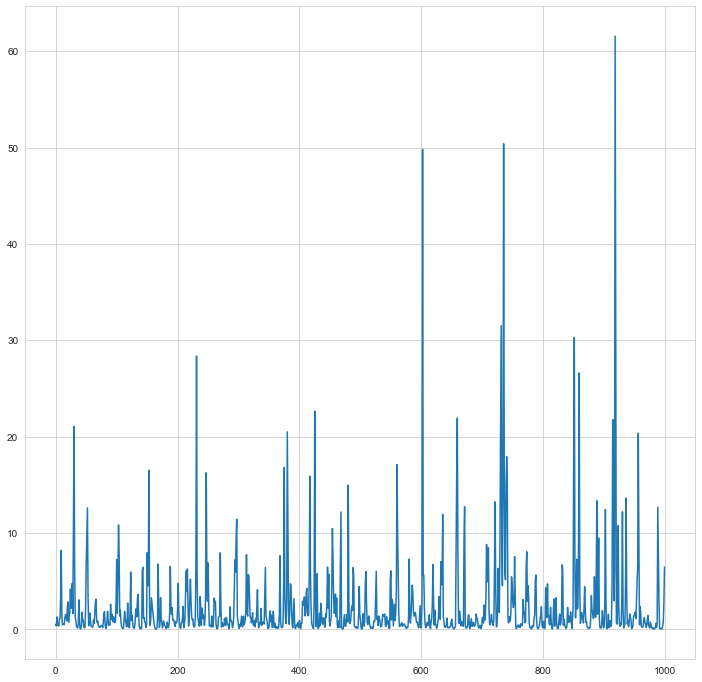

In [43]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(df.Close)

### It looks like non-stationary timeseries because variance increase when Y<sub>t</sub> to Y<sub>t+1</sub>

## 2. (10 pts) Apply transformations (e.g. log, power) and/or differencing to make the series look stationary. Show the plots and briefly discuss why or why not they look like a stationary series. (Just based on the shape of the plot)

In [4]:
log_price = list(map(lambda x : np.log(x+1),df.Close))
df2 = pd.DataFrame(log_price,columns=["Close"])

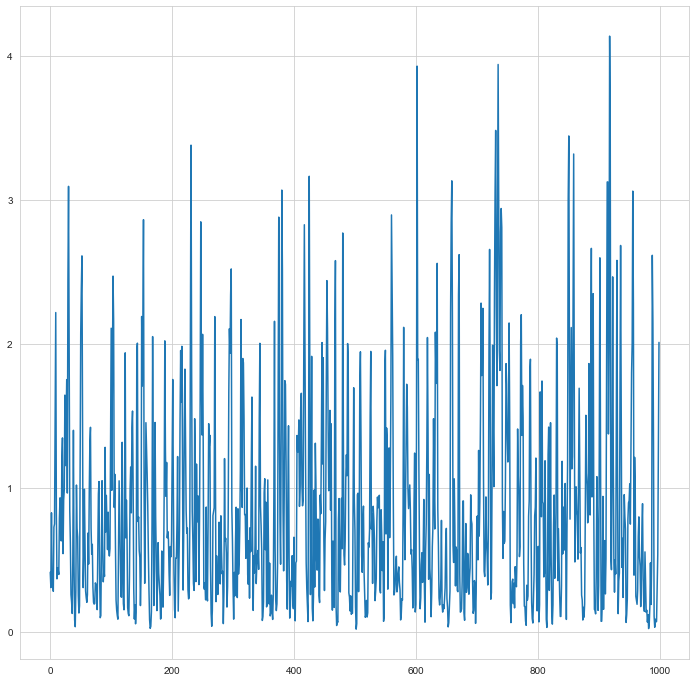

In [147]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(df2.Close)

### When I take log(x+1) to data and plot, data looks like it has constant mean, variance. As a result, it looks like stationary time series.

## 3. (10 pts) After transformation and/or differencing, plot its ACF and PACF. What would be the most appropriate orders of ARMA(p,q)? Briefly discuss why. (Just based on the shape of the ACF and PACF plots)

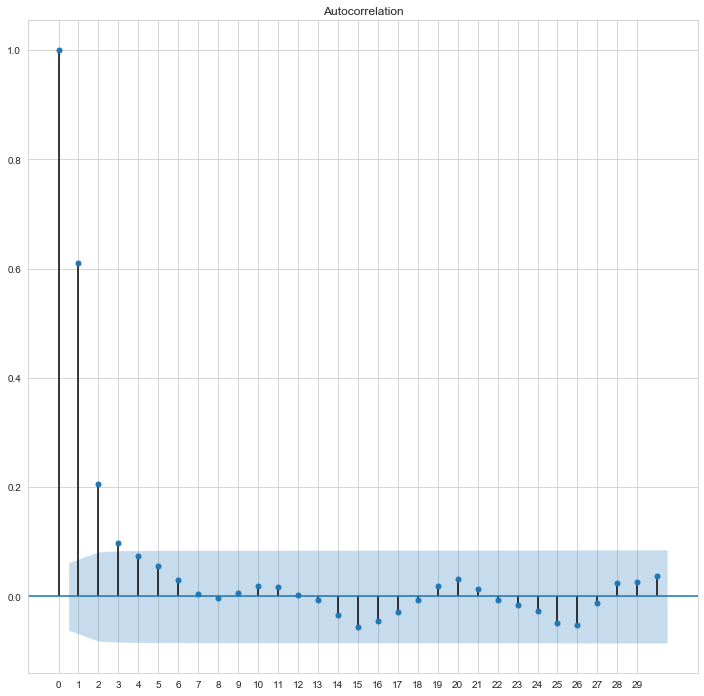

In [148]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
plot_acf(df2.Close,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

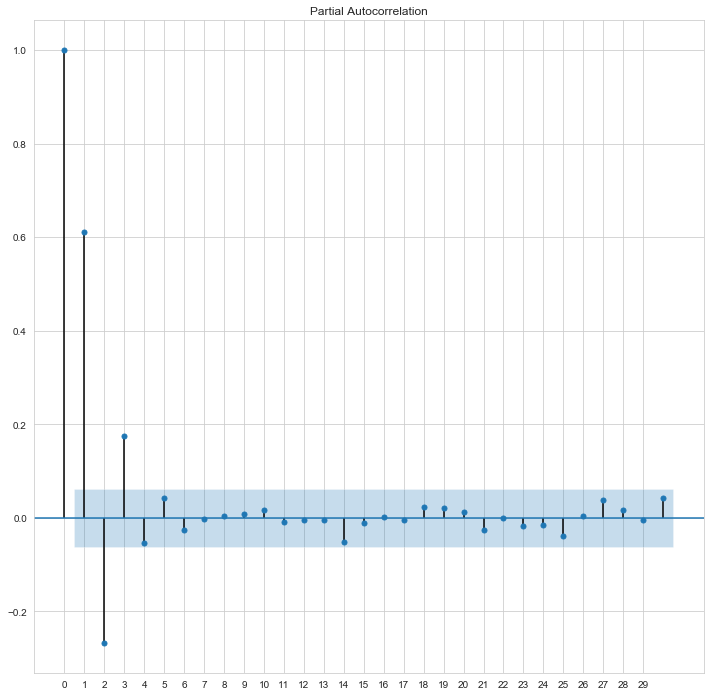

In [149]:
fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
plot_pacf(df2.Close,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

### When we see ACF, we can know that it cuts off after time lag3. As a result in MA part, we can suggest MA(3) model.
### Wehn we see PACF, we can know that it cuts off after time lag4. As a result in AR part, we can suggest AR(4) model.
### In conclusion, we can suggest ARMA(4,3) model.

## 4. (10 pts) Plot residuals after fitting the chosen ARMA(p,q) model. Also, plot its ACF and QQ-plot. Briefly discuss whether the model is appropriate or not.

Text(0.5, 1.0, 'ARMA(4,4) model')

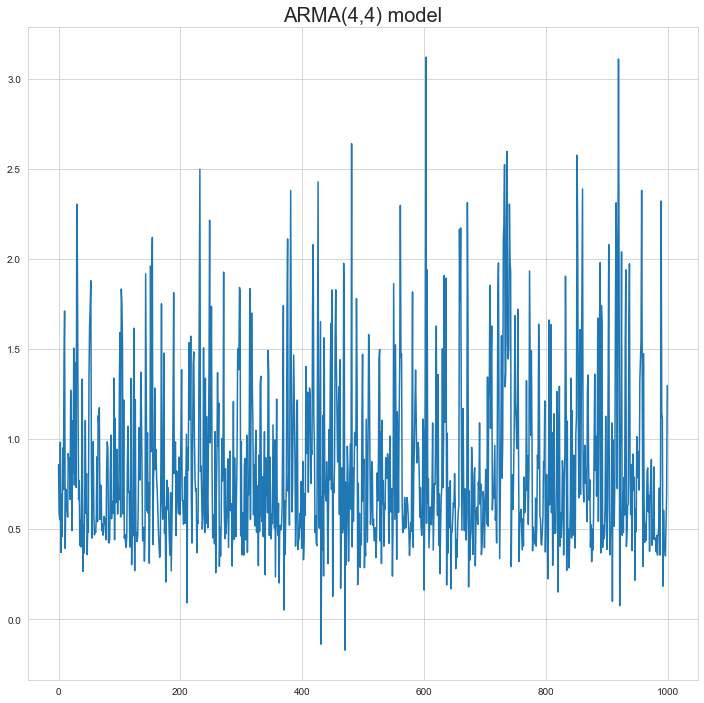

In [154]:
arma = sm.tsa.arima_model.ARIMA(df2.Close.values,order=(4,0,4))
result = arma.fit()
pred = result.predict()
fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(result.predict())
ax.set_title("ARMA(4,4) model",fontsize=20)

In [155]:
pred_np = np.array(pred)
close_np = np.array(df2.Close)
residual = close_np-pred_np

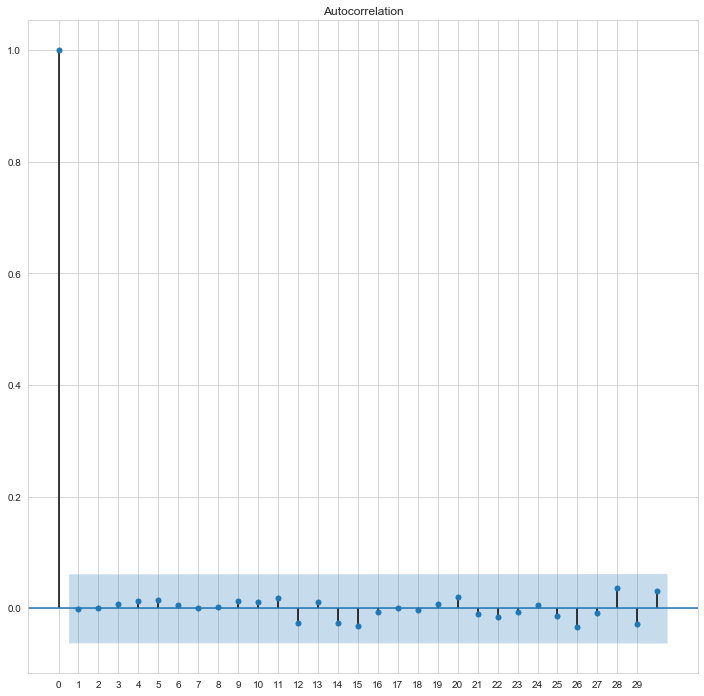

In [156]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
plot_acf(residual,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

Text(0.5, 1.0, 'Distribution of Residual')

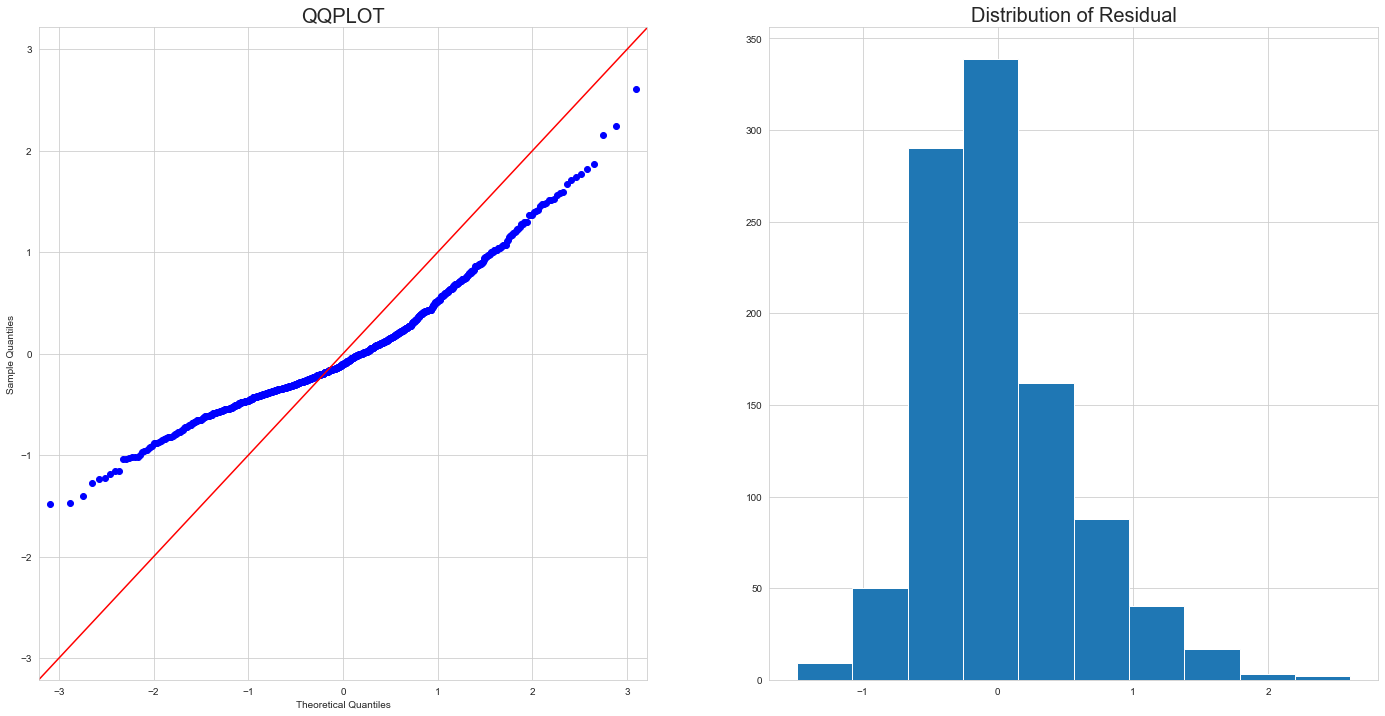

In [157]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,2)
sm.graphics.gofplots.qqplot(residual,ax=ax[0],line="45")
ax[0].set_title("QQPLOT",fontsize=20)
ax[1].hist(residual)
ax[1].set_title("Distribution of Residual",fontsize=20)

### When we see ACF of residual, there is no correlationships between time lags k. As a result, it fitted well. However, when we see QQPLOT, we can know that it doesn't follow normal distribution and it looks like right skewed distribution. If data fitted well, residual should follow normal distribution but in this case, it doesn't follow normal distribution so it failed to fitted well.